In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [3]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]      # 컬럼0(꽃받침 길이)과 컬럼2(꽃잎 길이) 값을 가지고 옴
y = iris.target               # 정답값(꽃종류) 을 가지고 옴

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=1, stratify=y)

In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = torch.argmax(classifier(torch.FloatTensor(np.array([xx1.ravel(), xx2.ravel()]).T)),dim=1)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)): #[0,1] 처음 반복에서 idx=0 cl=0 그 다음에는 idx=1 cl=1
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
    #print(idx)
    #print(cl)
    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [6]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

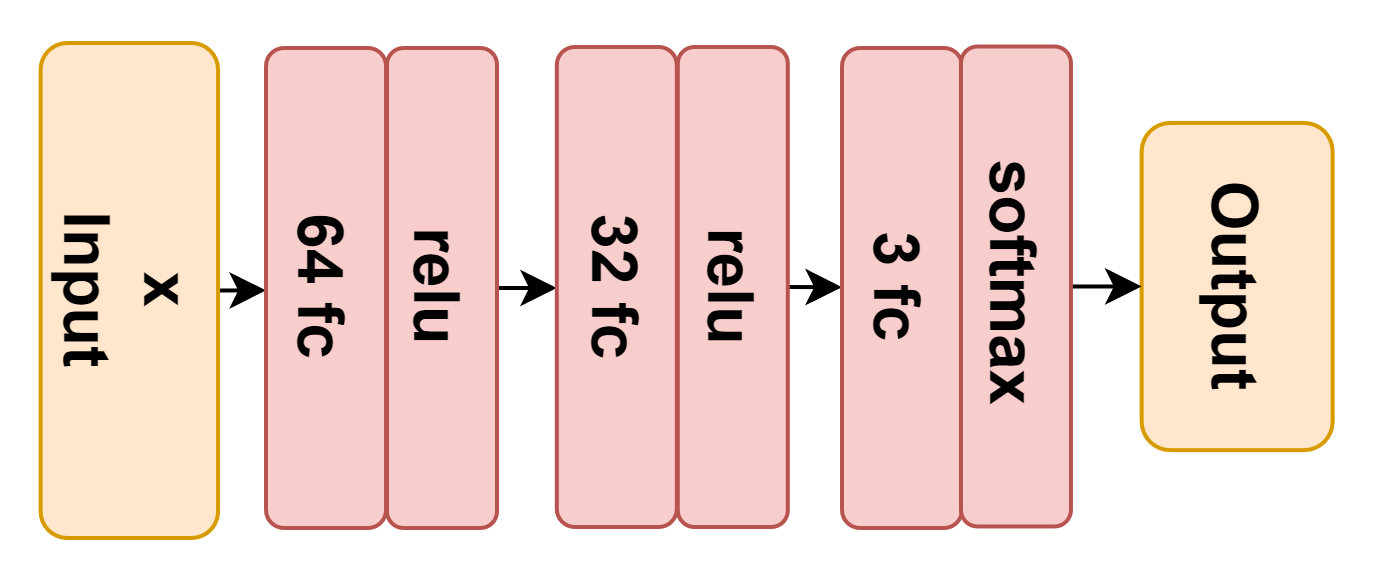

In [8]:
linear1 = torch.nn.Linear(2, 64, bias=True)
linear2 = torch.nn.Linear(64, 32, bias=True)
linear3 = torch.nn.Linear(32, 3, bias=True)
sigmoid = torch.nn.Sigmoid()
relu = torch.nn.ReLU()
softmax=torch.nn.Softmax()
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3,softmax).to(device)

In [9]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [10]:
epochs = 300 #훈련 횟수 100번
losses = [] # loss를 담을 리스트, 시각화 하기 위함

for i in range(epochs):
  optimizer.zero_grad()   # 기존 계산한 경사값 삭제
  output = model(X_train)       # 순방향 연산
  cost = criterion(output, y_train)   # 손실함수 설정
  cost.backward()         # 경사값 계산
  optimizer.step()        # 업데이트 1회 수행

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


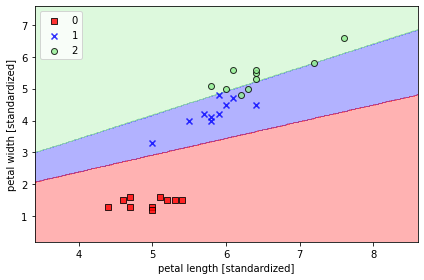

In [11]:
plot_decision_regions(X_train, y_train,
                      classifier=model)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
out=model(X_test)
out=torch.argmax(out,dim=1)

r=np.random.randint(0,20)

print(out[r])
print(y_test[r])

tensor(1)
tensor(1)
